In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt 
import ipywidgets as widgets

In [5]:
filename = 'sales_data.csv'
df = pd.read_csv(filename,",")

df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
2,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [6]:
df['sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,sales
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
2,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


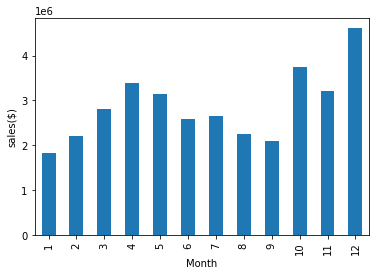

In [7]:
ax = df.groupby (['Month']).sum() ['sales'].plot(kind='bar')
plt.ylabel('sales($)')
plt.xlabel('Month')
plt.show ()

In [8]:
city = widgets.Dropdown(name = 'City')

In [9]:
list (df.City.unique())

['Dallas  (TX)',
 'Boston  (MA)',
 'Los Angeles  (CA)',
 'San Francisco  (CA)',
 'Seattle  (WA)',
 'Atlanta  (GA)',
 'New York City  (NY)',
 'Portland  (OR)',
 'Austin  (TX)',
 'Portland  (ME)']

In [10]:
wid_city = widgets.Dropdown(name='city')

In [11]:
wid_city.options = list (df.City.unique())

In [21]:
wid_city

Dropdown(description='city', index=2, options=('Dallas  (TX)', 'Boston  (MA)', 'Los Angeles  (CA)', 'San Franc…

In [22]:
wid_city.value

'Los Angeles  (CA)'

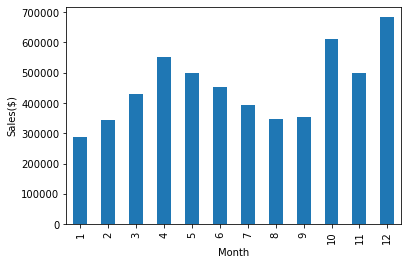

In [23]:
df_tmp =df[df['City']==wid_city.value].copy()
ax = df_tmp.groupby (['Month']).sum() ['sales'].plot(kind='bar')
plt.ylabel('Sales($)')
plt.xlabel('Month')
plt.show ()

In [24]:
wid_city = widgets.Dropdown(name='city')
wid_city.options = list (df.City.unique())

wid_product = widgets.Dropdown(name='product')
wid_product.options = list(df.Product.unique())

def func (city,product):
    
    df_tmp = df[df['City'] == wid_city.value].copy()
    df_tmp = df_tmp[df_tmp['Product'] == wid_product.value]
        
    ax = df_tmp.groupby(['Month']).sum()['sales'].plot(kind='bar')
    plt.ylabel('Sales($)')
    plt.xlabel('Month')
    plt.show()
    
interactive_plot = widgets.interactive(func, city=wid_city, product=wid_product)
    
output = interactive_plot.children[-1]
output.layout.height = '350px'
    
interactive_plot

interactive(children=(Dropdown(description='city', options=('Dallas  (TX)', 'Boston  (MA)', 'Los Angeles  (CA)…